In [41]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
train_df = pd.read_csv("Data/brunello_train_shap.csv")
test_df = pd.read_csv("Data/brunello_test_shap.csv")

In [55]:
print(train_df.shape)
print(test_df.shape)

(100, 22)
(5000, 22)


In [56]:
X, y = np.array(train_df.iloc[:,1:-1]), np.array(train_df.iloc[:,-1])
X_test, y_test = np.array(test_df.iloc[:,1:-1]), np.array(test_df.iloc[:,-1])
y = y.astype(int)
y_test = y_test.astype(int)

model = 'logistic'
problem = 'classification'
num_test = 1200
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Starting LOO score calculations!
LOO values calculated!


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


In [57]:
dshap.merge_results()

./temp/mem_tmc_0000.pkl
./temp/mem_g_0000.pkl


In [58]:
tmc_values = dshap.vals_tmc
loo_values = dshap.vals_loo

In [59]:
from scipy import stats

print(stats.describe(tmc_values))
print(stats.describe(loo_values))

DescribeResult(nobs=100, minmax=(-0.0041988095238095205, 0.005913095238095235), mean=0.0008071785714285712, variance=4.394626414513614e-06, skewness=0.19168406845152114, kurtosis=-0.5138266376044256)
DescribeResult(nobs=100, minmax=(-0.00666666666666671, 0.004166666666666652), mean=-0.0013166666666666904, variance=7.115319865319853e-06, skewness=-0.09332598900917088, kurtosis=-0.8803325730735745)


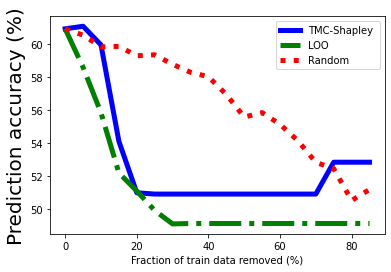

In [60]:
fig1 = dshap.performance_plots([dshap.values_tmc, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

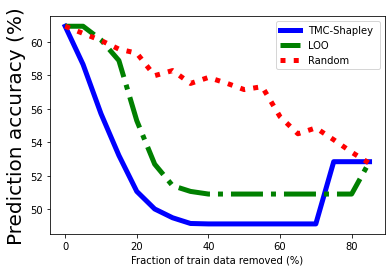

In [61]:
fig2 = dshap.performance_plots([dshap.values_tmc, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources,order = "a")